In [3]:
pip install matplotlib


/Users/kumarabhinav/.zshenv:.:1: no such file or directory: /Users/kumarabhinav/.cargo/env
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 15.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.4/253.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 6.4 MB/s eta 0:00:00
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 18.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install statsmodels

/Users/kumarabhinav/.zshenv:.:1: no such file or directory: /Users/kumarabhinav/.cargo/env
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 18.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 12.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import datetime

In [7]:
# 1. Generate Synthetic Monthly Demand Data
# -----------------------------------------
np.random.seed(42)  # for reproducibility
periods = 24  # 24 months (2 years of data)
dates = pd.date_range(start="2021-01-01", periods=periods, freq='MS')

In [8]:
# Let's simulate a baseline monthly demand of 80 units
# We'll add:
#  - slight upward trend
#  - random seasonal variation
#  - random noise

In [10]:
trend = np.linspace(0, 10, periods)         # goes from 0 to +10 over 2 years
seasonal = 10 * np.sin(2 * np.pi * np.arange(periods)/12)  # annual seasonality
noise = np.random.normal(loc=0, scale=5, size=periods)
# Combine all components to create demand
baseline = 80
demand = baseline + trend + seasonal + noise

In [11]:
# Create a DataFrame
df = pd.DataFrame({
    'date': dates, 
    'monthly_demand': demand
})
df.set_index('date', inplace=True)

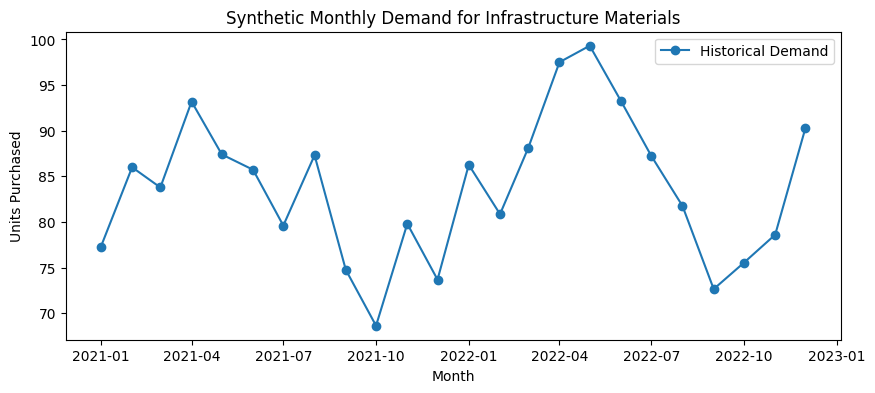

In [12]:
# 2. Visualize the Historical Demand
# ----------------------------------
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['monthly_demand'], marker='o', label='Historical Demand')
plt.title("Synthetic Monthly Demand for Infrastructure Materials")
plt.xlabel("Month")
plt.ylabel("Units Purchased")
plt.legend()
plt.show()

In [13]:
# 3. Build and Fit an ARIMA Model
# --------------------------------
# We'll pick a naive ARIMA(1,1,1) for demonstration. In practice, you'd use
# auto_arima or check p/d/q systematically.

model = ARIMA(df['monthly_demand'], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         monthly_demand   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -78.590
Date:                Tue, 15 Apr 2025   AIC                            163.181
Time:                        23:01:44   BIC                            166.587
Sample:                    01-01-2021   HQIC                           164.038
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6303      0.616     -1.023      0.306      -1.837       0.577
ma.L1          0.4188      0.758      0.553      0.580      -1.066       1.903
sigma2        54.1792     28.099      1.928      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
# 4. Forecast Next 6 Months
# --------------------------------
future_steps = 6
forecast = model_fit.forecast(steps=future_steps)

# Create a date range for the forecast period
last_date = df.index[-1]
forecast_index = pd.date_range(last_date + pd.DateOffset(months=1), 
                               periods=future_steps, freq='MS')

# Convert forecast to a DataFrame
forecast_df = pd.DataFrame({
    'forecast': forecast.values
}, index=forecast_index)

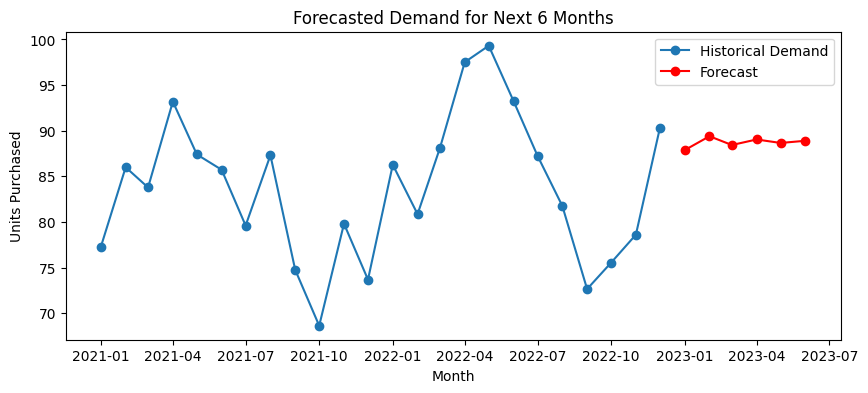

In [15]:
# 5. Plot Historical Demand + Forecast
# ------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['monthly_demand'], marker='o', label='Historical Demand')
plt.plot(forecast_df.index, forecast_df['forecast'], marker='o', color='red', label='Forecast')
plt.title("Forecasted Demand for Next 6 Months")
plt.xlabel("Month")
plt.ylabel("Units Purchased")
plt.legend()
plt.show()